<a href="https://colab.research.google.com/github/Ibrmva/24-7/blob/main/draft(Gulaiym).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1704/1704 [==============================] - 6s 3ms/step - loss: 0.6813 - accuracy: 0.5616 - val_loss: 0.6768 - val_accuracy: 0.5777
Epoch 2/10
1704/1704 [==============================] - 3s 2ms/step - loss: 0.6698 - accuracy: 0.5837 - val_loss: 0.6744 - val_accuracy: 0.5760
Epoch 3/10
1704/1704 [==============================] - 3s 2ms/step - loss: 0.6654 - accuracy: 0.5896 - val_loss: 0.6733 - val_accuracy: 0.5777
Epoch 4/10
1704/1704 [==============================] - 4s 2ms/step - loss: 0.6616 - accuracy: 0.5974 - val_loss: 0.6744 - val_accuracy: 0.5751
Epoch 5/10
1704/1704 [==============================] - 4s 2ms/step - loss: 0.6586 - accuracy: 0.6012 - val_loss: 0.6770 - val_accuracy: 0.5706
Epoch 6/10
1704/1704 [==============================] - 3s 2ms/step - loss: 0.6553 - accuracy: 0.6067 - val_loss: 0.6778 - val_accuracy: 0.5740
Epoch 7/10
1704/1704 [==============================] - 4s 2ms/step - loss: 0.6519 - accuracy: 0.6123 - val_loss: 0.6804 - val_accuracy:

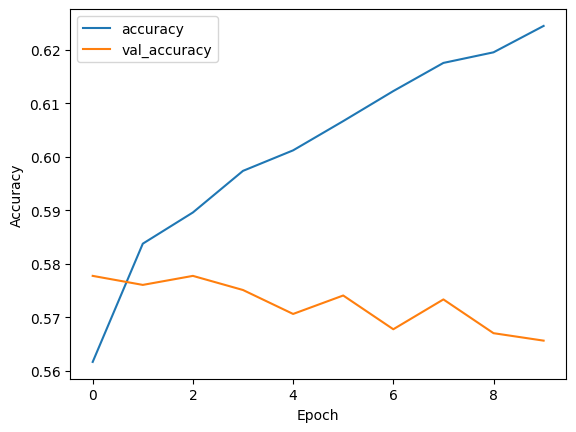

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Preprocess the data

# Load the data
data = pd.read_csv('team_scoring.csv')  # Replace 'your_data.csv' with the actual file path

# Drop irrelevant columns (e.g., 'gameid', 'date', 'type', 'teamid', 'team', 'season')
data.drop(columns=['gameid', 'date', 'type', 'teamid', 'team', 'season'], inplace=True)

# Handling missing values (if any)
data.dropna(inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=['home', 'away'])

# Splitting data into features (X) and target variable (y)
X = data.drop(columns=['win'])
y = data['win']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Design the Neural Network Architecture

def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Step 3: Compile the Model

def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Step 4: Create and compile the model
model = create_model(input_shape=X_train_scaled.shape[1:])
compile_model(model)

# Step 5: Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Step 6: Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/50
852/852 [==============================] - 5s 5ms/step - loss: 0.6870 - accuracy: 0.5462 - val_loss: 0.6773 - val_accuracy: 0.5793
Epoch 2/50
852/852 [==============================] - 3s 4ms/step - loss: 0.6774 - accuracy: 0.5691 - val_loss: 0.6761 - val_accuracy: 0.5840
Epoch 3/50
852/852 [==============================] - 4s 4ms/step - loss: 0.6736 - accuracy: 0.5782 - val_loss: 0.6711 - val_accuracy: 0.5860
Epoch 4/50
852/852 [==============================] - 4s 5ms/step - loss: 0.6705 - accuracy: 0.5833 - val_loss: 0.6705 - val_accuracy: 0.5865
Epoch 5/50
852/852 [==============================] - 3s 4ms/step - loss: 0.6690 - accuracy: 0.5867 - val_loss: 0.6690 - val_accuracy: 0.5907
Epoch 6/50
852/852 [==============================] - 3s 4ms/step - loss: 0.6670 - accuracy: 0.5895 - val_loss: 0.6727 - val_accuracy: 0.5823
Epoch 7/50
852/852 [==============================] - 3s 4ms/step - loss: 0.6656 - accuracy: 0.5926 - val_loss: 0.6705 - val_accuracy: 0.5866
Epoch 

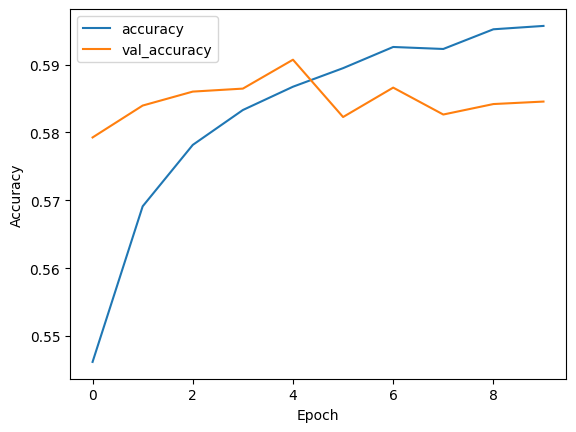

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Step 1: Preprocess the data

# Load the data
data = pd.read_csv('team_scoring.csv')  # Replace 'your_data.csv' with the actual file path

# Drop irrelevant columns (e.g., 'gameid', 'date', 'type', 'teamid', 'team', 'season')
data.drop(columns=['gameid', 'date', 'type', 'teamid', 'team', 'season'], inplace=True)

# Handling missing values (if any)
data.dropna(inplace=True)

# Encoding categorical variables
data = pd.get_dummies(data, columns=['home', 'away'])

# Splitting data into features (X) and target variable (y)
X = data.drop(columns=['win'])
y = data['win']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Design the Neural Network Architecture

def create_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Step 3: Compile the Model

def compile_model(model):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Step 4: Create and compile the model
model = create_model(input_shape=X_train_scaled.shape[1:])
compile_model(model)

# Step 5: Train the model with early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Step 6: Evaluate the model
_, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('team_scoring.csv')  # Replace 'your_data.csv' with the actual file path

# Drop irrelevant columns (e.g., 'gameid', 'date', 'type', 'teamid', 'team', 'season', 'home', 'away')
data.drop(columns=['gameid', 'date', 'type', 'teamid', 'team', 'season', 'home', 'away'], inplace=True)


# Handling missing values (if any)
data.dropna(inplace=True)

# Splitting data into features (X) and target variable (y)
X = data.drop(columns=['win'])
y = data['win']

# Normalizing data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5901218259210333


In [ ]:
data.head()

,MIN,%FGA 2PT,%FGA 3PT,%PTS 2PT,%PTS 2PT MR,%PTS 3PT,%PTS FBPS,%PTS FT,%PTS OFF TO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win
0,48.0,76.2,23.8,61.2,12.2,24.5,15.3,14.3,16.3,49.0,46.7,53.3,75.0,25.0,52.6,47.4,0
1,48.0,82.4,17.6,76.6,24.3,2.8,14.0,20.6,19.6,52.3,68.3,31.7,0.0,100.0,66.7,33.3,1
2,48.0,69.0,31.0,36.4,2.6,35.1,5.2,28.6,18.2,33.8,50.0,50.0,66.7,33.3,56.5,43.5,0
3,48.0,86.1,13.9,64.4,24.4,16.7,6.7,18.9,26.7,40.0,44.8,55.2,60.0,40.0,47.1,52.9,1
4,48.0,89.3,10.7,61.3,19.8,10.8,8.1,27.9,9.9,41.4,55.9,44.1,50.0,50.0,55.3,44.7,1


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('team_scoring.csv')

# Assuming 'win' is your target variable
class_counts = data['win'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()

print(f'Class counts:\n{class_counts}\n')
print(f'Imbalance ratio: {imbalance_ratio:.2f}')


Class counts:
0    34064
1    34064
Name: win, dtype: int64

Imbalance ratio: 1.00


In [ ]:
data.head()

,gameid,date,type,teamid,team,home,away,MIN,%FGA 2PT,%FGA 3PT,...,%PTS OFF TO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win,season
0,29600001,1996-11-01,regular,1610612738,BOS,BOS,CHI,48.0,76.2,23.8,...,16.3,49.0,46.7,53.3,75.0,25.0,52.6,47.4,0,1997
1,29600001,1996-11-01,regular,1610612741,CHI,BOS,CHI,48.0,82.4,17.6,...,19.6,52.3,68.3,31.7,0.0,100.0,66.7,33.3,1,1997
2,29600002,1996-11-01,regular,1610612751,NJN,NJN,CLE,48.0,69.0,31.0,...,18.2,33.8,50.0,50.0,66.7,33.3,56.5,43.5,0,1997
3,29600002,1996-11-01,regular,1610612739,CLE,NJN,CLE,48.0,86.1,13.9,...,26.7,40.0,44.8,55.2,60.0,40.0,47.1,52.9,1,1997
4,29600003,1996-11-01,regular,1610612749,MIL,PHI,MIL,48.0,89.3,10.7,...,9.9,41.4,55.9,44.1,50.0,50.0,55.3,44.7,1,1997


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('team_scoring.csv')

# Convert non-numeric columns to numeric
non_numeric_cols = ['date', 'type', 'team', 'home', 'away']
label_encoders = {col: LabelEncoder() for col in non_numeric_cols}
for col in non_numeric_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the data into features (X) and target (y)
X = data.drop(['win'], axis=1)
y = data['win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/10
1363/1363 [==============================] - 4s 2ms/step - loss: 0.6689 - accuracy: 0.5897 - val_loss: 0.6617 - val_accuracy: 0.5990
Epoch 2/10
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6595 - accuracy: 0.6021 - val_loss: 0.6580 - val_accuracy: 0.6013
Epoch 3/10
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6559 - accuracy: 0.6075 - val_loss: 0.6574 - val_accuracy: 0.6064
Epoch 4/10
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6534 - accuracy: 0.6112 - val_loss: 0.6583 - val_accuracy: 0.6041
Epoch 5/10
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6510 - accuracy: 0.6164 - val_loss: 0.6588 - val_accuracy: 0.6054
Epoch 6/10
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6488 - accuracy: 0.6195 - val_loss: 0.6555 - val_accuracy: 0.6088
Epoch 7/10
1363/1363 [==============================] - 3s 2ms/step - loss: 0.6471 - accuracy: 0.6207 - val_loss: 0.6552 - val_accuracy:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv('team_scoring.csv')

# Convert non-numeric columns to numeric
non_numeric_cols = ['date', 'type', 'team', 'home', 'away']
label_encoders = {col: LabelEncoder() for col in non_numeric_cols}
for col in non_numeric_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the data into features (X) and target (y)
X = data.drop(['win'], axis=1)
y = data['win']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a larger number of epochs
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/10
682/682 [==============================] - 9s 10ms/step - loss: 0.6840 - accuracy: 0.5576 - val_loss: 0.6708 - val_accuracy: 0.5839
Epoch 2/10
682/682 [==============================] - 9s 13ms/step - loss: 0.6742 - accuracy: 0.5774 - val_loss: 0.6657 - val_accuracy: 0.5942
Epoch 3/10
682/682 [==============================] - 8s 11ms/step - loss: 0.6684 - accuracy: 0.5889 - val_loss: 0.6644 - val_accuracy: 0.5972
Epoch 4/10
682/682 [==============================] - 7s 10ms/step - loss: 0.6663 - accuracy: 0.5916 - val_loss: 0.6616 - val_accuracy: 0.5966
Epoch 5/10
682/682 [==============================] - 4s 6ms/step - loss: 0.6639 - accuracy: 0.5974 - val_loss: 0.6605 - val_accuracy: 0.6046
Epoch 6/10
682/682 [==============================] - 3s 4ms/step - loss: 0.6619 - accuracy: 0.6005 - val_loss: 0.6591 - val_accuracy: 0.6017
Epoch 7/10
682/682 [==============================] - 2s 3ms/step - loss: 0.6609 - accuracy: 0.6028 - val_loss: 0.6597 - val_accuracy: 0.6014
Ep

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale the features to make them non-negative
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the top 10 features
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['%PTS 2PT', '%PTS 3PT', '%PTS FBPS', '%PTS OFF TO', '%PTS PITP',
       '2FGM %AST', '2FGM %UAST', '3FGM %UAST', 'FGM %AST', 'FGM %UAST'],
      dtype='object')


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
data = pd.read_csv('team_scoring.csv')

# Convert non-numeric columns to numeric
non_numeric_cols = ['date', 'type', 'team', 'home', 'away']
label_encoders = {col: LabelEncoder() for col in non_numeric_cols}
for col in non_numeric_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# Split the data into features (X) and target (y)
X = data.drop(['win'], axis=1)
y = data['win']

In [21]:
data.head()

,gameid,date,type,teamid,team,home,away,MIN,%FGA 2PT,%FGA 3PT,...,%PTS OFF TO,%PTS PITP,2FGM %AST,2FGM %UAST,3FGM %AST,3FGM %UAST,FGM %AST,FGM %UAST,win,season
0,29600001,0,2,1610612738,2,2,5,48.0,76.2,23.8,...,16.3,49.0,46.7,53.3,75.0,25.0,52.6,47.4,0,1997
1,29600001,0,2,1610612741,5,2,5,48.0,82.4,17.6,...,19.6,52.3,68.3,31.7,0.0,100.0,66.7,33.3,1,1997
2,29600002,0,2,1610612751,19,19,6,48.0,69.0,31.0,...,18.2,33.8,50.0,50.0,66.7,33.3,56.5,43.5,0,1997
3,29600002,0,2,1610612739,6,19,6,48.0,86.1,13.9,...,26.7,40.0,44.8,55.2,60.0,40.0,47.1,52.9,1,1997
4,29600003,0,2,1610612749,17,26,17,48.0,89.3,10.7,...,9.9,41.4,55.9,44.1,50.0,50.0,55.3,44.7,1,1997


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
print(f"X_train data type: {type(X_train)}")
print(f"y_train data type: {type(y_train)}")

X_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'pandas.core.series.Series'>


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape)
print(y_train.shape)

(54502, 24)
(54502,)


In [15]:
data.shape

(68128, 25)

In [16]:
# Define the model
# Build the neural network model

model = tf.keras.Sequential([
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Build the model
model.build(input_shape=(68128, 25))

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (68128, 16)               416       
                                                                 
 dense_16 (Dense)            (68128, 32)               544       
                                                                 
 dense_17 (Dense)            (68128, 10)               330       
                                                                 
Total params: 1290 (5.04 KB)
Trainable params: 1290 (5.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train =

In [3]:

combined_data = pd.concat([X_train, X_test])
encoder = OneHotEncoder()

combined_data = pd.concat([X_train, X_test])
encoder.fit(combined_data[categorical_columns])

X_train_encoded = encoder.transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

print(X_train_encoded.shape)
print(X_test_encoded.shape)
y_train.isnull().sum()
y_train.count()
y_train[~y_train.isnull()]
y_train[~y_train.isnull() & ~y_train.astype(str).str.isnumeric()].count()
y_train.head()
non_numeric_values = y_train[~y_train.apply(lambda x: x.isnumeric())]
y_train = y_train[~y_train.isin(['MIA'])]
y_train = y_train.replace('MIA', np.nan)
y_train = y_train.apply(lambda x: float('nan') if not x.isnumeric() else float(x))
y_train = y_train.astype(float)
print(y_train.head())
columns_with_nan = df.columns[df.isna().any()].tolist()
non_numeric_values = y_train[~y_train.apply(lambda x: str(x).isnumeric())]
print(f"Non-numeric values: {non_numeric_values}")
for column in columns_with_nan:
  nan_count = df[column].isna().sum()
  print(f"Column '{column}' has {nan_count} NaN values")
for column in X.columns:
    unique_values = X[column].unique()
    if any(isinstance(value, str) for value in unique_values):
        print(f"Column '{column}' contains string values:")
        print(unique_values)
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))


NameError: name 'x_train' is not defined